# DEMO

In this notebook the previously build model will be demonstared by using the testing data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import mlflow
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
def calc_metrics(actual_data: pd.Series, prediction_data: np.ndarray):
    """
    calculate the different metrics (mean squared error, root mean squared error, mean absolute error 
        and mean absolute percentage error) to evaluate the model accuracy.
    
    Params:
        actual_data (Series): the actual imported data
        prediction_data (ndarray): the from the model predicted data
    
    Returns:
        mse (Float): the calculated mean squared error value
        rmse (Float): the calculated root mean squared error value
        mae (Float): the claclulated mean absolute error value
        mape (FLoat): the calculated mean absolute percentage error value
    """
    mse = mean_squared_error(actual_data, prediction_data)
    rmse = mean_squared_error(actual_data, prediction_data, squared = False)
    mae = mean_absolute_error(actual_data, prediction_data)
    mape = np.mean(np.abs((actual_data - prediction_data) / actual_data)) * 100
    
    print('########## METRICS ##########')
    print('MSE:\t%s\nRMSE:\t%s\nMAE:\t%s\nMAPE:\t%s' % (mse, rmse, mae, mape))
    
    return mse, rmse, mae, mape

In [4]:
# get data
df = pd.read_csv('./data/WorldHappinessReport/2019.csv')
# set new index for DataFrame
df.set_index('Country or region', inplace = True)
#df.head()

In [5]:
# define target feature and create feature list
target_feature = 'Score'
features = df.columns.to_list()
features = [feature for feature in features if feature not in target_feature]

In [6]:
# get the testing data for the demo
# Split all data in training and testing data (Size 90 / 10)
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target_feature], test_size = 0.1, random_state = 1)

In [7]:
# import model with paramter alpha = 4.7 and l1_ratio = 1.0 from training notebook
#best_model = 'runs:/52896f1ea0d5442984343ea2a16f15bd/model'

# import model with paramter alpha = 5.0 and l1_ratio = 10.0 from training notebook
best_model = 'runs:/2e6ce20b8fc945628405024e9c61894c/model'

# Load model as a PyFuncModel
model = mlflow.pyfunc.load_model(best_model)

# Predict on a Pandas DataFrame
pred = model.predict(X_test)

In [12]:
# get accuracy of the prediction with the testing data
mse, rmse, mae, mape = calc_metrics(y_test, pred)

########## METRICS ##########
MSE:	0.03987660209918589
RMSE:	0.19969126695773626
MAE:	0.13229570585583064
MAPE:	2.651541739765586


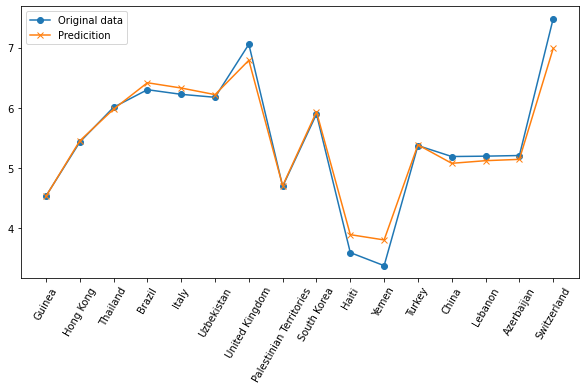

In [10]:
# plot the original datapoints and the predicted datapoints
fig, axs = plt.subplots(1, 1, figsize = (10, 5))
axs.plot(y_test, marker = 'o')
axs.plot(pred, marker = 'x')
axs.tick_params(axis = 'x', rotation = 60)
axs.legend(['Original data', 'Predicition'])

We can see that the datapoints are pretty accurate which reflects the result from the calculated metrics.</br>
There are still some datapoints where there is bigger difference between the acutal datapoint and the predicted datapoint, especaily the datapoint with high or low actual datapoint. The predicted datapoint doesn't calculate the happiness score to the same extend as it would need to, to make a accurate prediction.